<a href="https://colab.research.google.com/github/dtminnick/pytorch-practice/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [45]:
# Create a model class than inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features) -->
  # Hidden Layer 1 (number of neurons) -->
  #H2 --> Output
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() # Instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [46]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create instance of model
model = Model()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [49]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

/tmp/ipython-input-1249557430.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [50]:
# Train, test, split
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [51]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [54]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [58]:
# Set criterion of model to measure the error, or how far off the predictions
# are from the data

criterion = nn.CrossEntropyLoss()

# Choose Adam optimizer, lr = learning rate.
# If error doesn't decrease at after a bunch of iterations,
# we want to lower our learning rate

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [60]:
# Train our model
# Epochs?  One run through all training data in our network
epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, going to be high at first
  loss = criterion(y_pred, y_train) # Predicted versus y_train value

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every ten epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some backpropagation, take the error rate of forward
  # propagation and feed it back through the network to fine tune the
  # weights to help the network learn better.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.1081159114837646
Epoch: 10 and loss: 0.9944550395011902
Epoch: 20 and loss: 0.7869501113891602
Epoch: 30 and loss: 0.5630682706832886
Epoch: 40 and loss: 0.3830472528934479
Epoch: 50 and loss: 0.25543275475502014
Epoch: 60 and loss: 0.17153234779834747
Epoch: 70 and loss: 0.11644677072763443
Epoch: 80 and loss: 0.08301658183336258
Epoch: 90 and loss: 0.06342919170856476


Text(0.5, 0, 'Epoch')

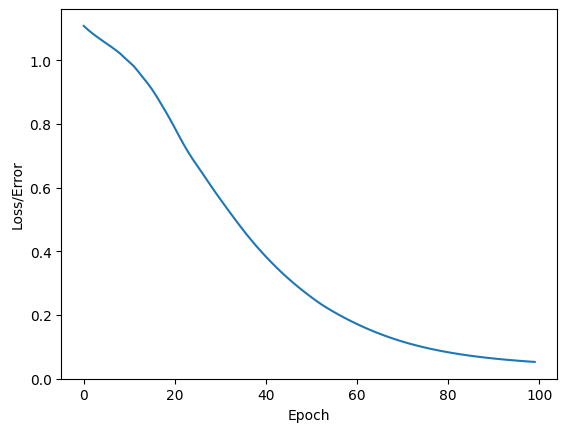

In [61]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')